In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Loading Data (CIFAR-10)

In [2]:
import torchvision
import torchvision.transforms as transforms
# Download the dataset and perform operations on it locally. 
# Also transform the dataset to tensors after downloading to perform operations on them.
trainset = torchvision.datasets.CIFAR10( root = './data/', train = True, download = True, transform = transforms.ToTensor())

Extracting ./data/cifar-10-python.tar.gz to ./data/


In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle= True)
# Load images in batch size of 4 and load random images.

In [5]:
dataiter = iter(trainloader)    # Load the data using Iterator.
images, labels = dataiter.next()    # Load one instance of the batch (load 1 of 4 image) with the corresponding label.

print(images.shape)         # We are working with 32x32 3d images ( i.e. 3 x 32 x 32). Here 4 corresponds to a batch size of 4.

print(images[0].shape)      # Taking 1 image from the batch and finding it's shape.
print(labels[0].item())     # Finding the label of the first image.

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
2


# Visualise data

To plot the image, it should be coverted from Tensor to Numpy.

In [6]:
img = images[0]
print(type(img))

<class 'torch.Tensor'>


In [7]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


Transpose for 2d is flipping rows and columns. But for higher dimensions like 3d, it is any permutations of the axis.

In [8]:
npimg = np.transpose(npimg, (1,2,0) )   # Flipping the first dim 3 i.e no of channels to z axis, to represent the image.
print(npimg.shape)

(32, 32, 3)


Plotting using MatPlotLib imshow.

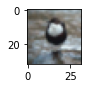

In [9]:
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [10]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow( np.transpose(npimg, (1,2,0) ) )
    plt.show()

Printing all the 4 images in a batch in a grid. Also printing the label of each image.

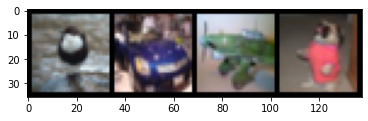

bird car plane dog


In [11]:
imshow( torchvision.utils.make_grid(images) )
print(' '.join(classes[labels[j]] for j in range(4)) )

# Single Convolutional Layer

In [12]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self):
        super(FirstCNN, self).__init__() 

        # self.conv1 = nn.Conv2d(3, 6, 3, padding =(1,1), stride = (2,2)) 
        self.conv1 = nn.Conv2d(3, 6, [3,3], padding =(1,1), stride = (2,2)) 
        # 1st param refers to the no of channels (in this case 3 channels RGB)
        # 2nd is the no of output channels, here 6 channels must be output. Here 6 different kernels go through the image and output 1 channel each.   
        # 3rd param is Kernel size of 3,3. Here writing 3 implies a square kernel of 3,3 is used. For rectangular kernels we can specify inside a list (eg [2,4] )
        
        # padding=(1,1) & stride=(2,2)) shows how much padding and stride required for each row and column.

    def forward(self, x):
        x = self.conv1(x)
        return x

In [13]:
net = FirstCNN()

In [14]:
out = net(images)
print(out.shape)

torch.Size([4, 6, 16, 16])


In the above 4 corresponds to the batch size, 16 represents to no of channels,  [16, 16] represents width and height of output.

In [15]:
for param in net.parameters():
    print(param.shape)

torch.Size([6, 3, 3, 3])
torch.Size([6])


Above first param is of the weights, in which 6 kernels are used each of channel size = 3 (input channels). The last 3,3 corresponds to kernel width and height. </br>
Second param is the bias of size 16.



In [16]:
out1 = out[0, 0, :, :].detach().numpy()
# 0th batch, 0th channel , all rows and columns. Conver this to numpy array to plot the image.
print(out1.shape)

(16, 16)


Plotting image 0.

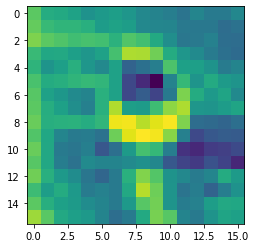

In [17]:
plt.imshow( out[0, 0, :, :].detach().numpy() )
plt.show()

Plotting image 1 with channel = 0.

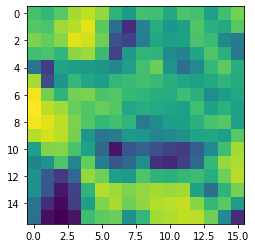

In [18]:
plt.imshow( out[1, 0, :, :].detach().numpy() )
plt.show()

Plotting channel 1 of image1.

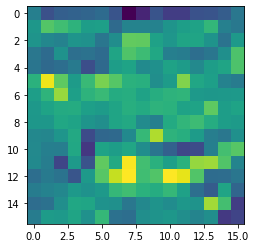

In [19]:
plt.imshow( out[1, 1, :, :].detach().numpy() )
plt.show()

# Deep Convolution Network

In [20]:
class FirstCNN_v2(nn.Module):
    def __init__(self):
        super(FirstCNN_v2, self).__init__() 
        self.model = nn.Sequential(
            nn.Conv2d(3, 8, [3,3]),     # 3 RGB channels, 8 output channels, 3x3 kernel
                                        # (N, 3, 32, 32) -> (N, 8, 30, 30). Here N is the batch size = 4.
            nn.Conv2d(8, 16, [3,3])     # 8 channels from prev layer output, 16 output channels, 3x3 kernel
                                        # (N, 8, 30, 30) -> (N, 16, 28, 28)
        )
        

    def forward(self, x):
        x = self.model(x)
        return x

In [21]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

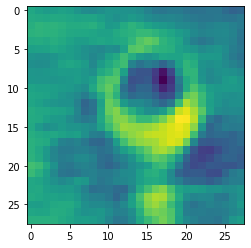

In [22]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

In [23]:
class FirstCNN_v3(nn.Module):
    def __init__(self):
        super(FirstCNN_v3, self).__init__() 
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, [5,5]),             # (N, 3, 32, 32) -> (N, 6, 28, 28). Here N is the batch size = 4.
            nn.AvgPool2d([2,2], stride =2 ),    # (N, 6, 28, 28) -> (N, 6, 14, 14). 
                                                # Take the avg of 2x2 weight batches. Does not change the no of channel.                    
            nn.Conv2d(6, 16, [5,5]),            # (N, 6, 28, 28) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride = 2)         # (N, 16, 24, 24) -> (N, 16, 5, 5). Stride =2 so it's dimensions get reduced to half.
                                        
        )
        

    def forward(self, x):
        x = self.model(x)
        return x

In [24]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

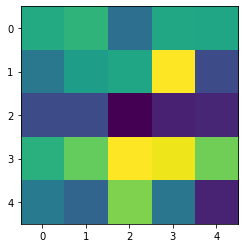

In [25]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

# LeNet

In [26]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, [5,5]),         # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.Tanh(),                  
            nn.AvgPool2d(2, stride = 2),    # (N, 6, 28, 28) -> (N, 6, 14, 14)          
            nn.Conv2d(6, 16, [5,5]),        # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.Tanh(),                      
            nn.AvgPool2d(2, stride = 2)     # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )

        self.fc_model = nn.Sequential(
            nn.Linear(400, 120),            # (N, 400) -> (N, 120). 
            # That is 16x5x5 neurons of Convolution is the total no of input nuerons to FFN. The next layer i.e. the first hidden layer has 120 neurons.
            nn.Tanh(),
            nn.Linear(120, 84),             # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84, 10),              # (N, 84) -> (N, 10)
        )
    
    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1)   # Flattening of Tensors to be fed to FFN is done here. 
        # It is done such that it has the same dimension on the first index which corresponds to the batch, & second index collapses everything i.e. 16x5x5.
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [27]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [28]:
print(out)

tensor([[ 0.0188,  0.0902,  0.0516,  0.0921, -0.1140, -0.0622,  0.0571, -0.0410,
          0.0860,  0.0573],
        [ 0.0287,  0.0894,  0.0447,  0.0868, -0.1049, -0.0791,  0.0526, -0.0444,
          0.0678,  0.0673],
        [ 0.0116,  0.0876,  0.0438,  0.0894, -0.1170, -0.0658,  0.0626, -0.0506,
          0.1003,  0.0572],
        [ 0.0127,  0.0869,  0.0606,  0.0875, -0.1085, -0.0687,  0.0482, -0.0488,
          0.0846,  0.0825]], grad_fn=<AddmmBackward>)


In [29]:
max_values, pred_class = torch.max(out.data, 1)     # Max value along dim 1 i.e. along the columns.
print(pred_class)

tensor([3, 1, 8, 3])


# Training LeNet

In [30]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [31]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10( root = './data/', train = True, download = True, transform = transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle= True)
testset = torchvision.datasets.CIFAR10( root = './data/', train = False, download = True, transform = transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle= False)

Files already downloaded and verified
Files already downloaded and verified


In [32]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [33]:
net = LeNet()

In [34]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 38.51, Train acc: 38.66
Epoch: 1/16, Test acc: 42.71, Train acc: 43.56
Epoch: 2/16, Test acc: 46.61, Train acc: 47.71
Epoch: 3/16, Test acc: 48.66, Train acc: 49.98
Epoch: 4/16, Test acc: 51.13, Train acc: 52.05
Epoch: 5/16, Test acc: 50.80, Train acc: 52.90
Epoch: 6/16, Test acc: 53.23, Train acc: 56.03
Epoch: 7/16, Test acc: 52.54, Train acc: 57.00
Epoch: 8/16, Test acc: 54.30, Train acc: 59.04
Epoch: 9/16, Test acc: 54.77, Train acc: 60.02
Epoch: 10/16, Test acc: 55.07, Train acc: 61.21
Epoch: 11/16, Test acc: 55.21, Train acc: 62.16
Epoch: 12/16, Test acc: 54.56, Train acc: 62.50
Epoch: 13/16, Test acc: 55.42, Train acc: 63.53
Epoch: 14/16, Test acc: 55.38, Train acc: 64.82
Epoch: 15/16, Test acc: 55.97, Train acc: 65.42


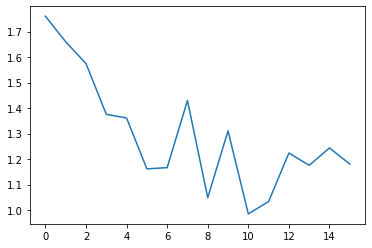

CPU times: user 6min 23s, sys: 2.59 s, total: 6min 26s
Wall time: 6min 26s


In [35]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append( loss.item() )
        
    loss_epoch_arr.append( loss.item() )
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

# Move to GPU

Loading inputs, labels to the GPU since they are tensors. Also load the LeNet object to the GPU. This way the loss_fn, optimiser and output are loaded in the GPU.</br>
Ensure that Input, Net and Output are all on the GPU to avoid data type mismatch.

In [36]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [37]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [38]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [39]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 1min 24s, sys: 613 ms, total: 1min 24s
Wall time: 1min 25s


In [40]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 55.83, Train acc: 65.24


# Basic Visualisation

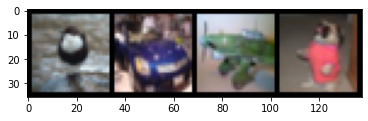

In [41]:
imshow( torchvision.utils.make_grid(images) )

In [42]:
net = net.to('cpu')

In [43]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [44]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

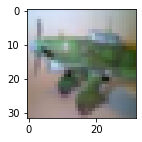

In [45]:
image_id = 2
plt.figure( figsize = (2,2))
imshow(images[image_id])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


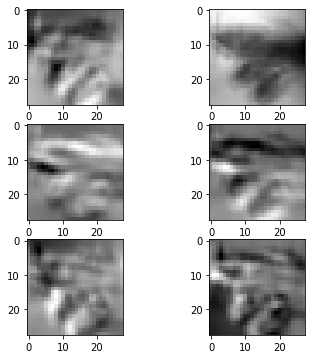

In [46]:
plt.figure(figsize = (6,6))
plt.subplot(321)    # Contains 3 rows and 2 columns.
for i in range(6):
    ax1 = plt.subplot(3,2, i+1)
    plt.imshow( out[image_id, i, :, :].detach().numpy(), cmap = "binary" )  # i represents the channel to display.
plt.show()